<a href="https://colab.research.google.com/github/yuqianlucy/awards_project/blob/main/awards_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Yuqian Wang(lucy)
### Date: 9/11/2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).**

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: XX.X points per game  
- 2nd Team: XX.X points per game  
- 3rd Team: XX.X points per game  
- All-Star: XX.X points per game   

**Question 2:** XX.X Years  

**Question 3:**

- Elite: X players.  
- All-Star: X players.  
- Starter: X players.  
- Rotation: X players.  
- Roster: X players.  
- Out of League: X players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** XX.X%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Note you will likely have to change these paths.
# If your data is in the same folder as this project,
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("/content/drive/MyDrive/Analyst intern/awards_data.csv")
player_data = pd.read_csv("/content/drive/MyDrive/Analyst intern/player_stats.csv")
team_data = pd.read_csv("/content/drive/MyDrive/Analyst intern/team_stats.csv")
rebounding_data = pd.read_csv("/content/drive/MyDrive/Analyst intern/team_rebounding_data_22.csv")

# having an basic look of each of the dataset

In [ ]:
awards.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
player_data.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


In [ ]:
team_data.head()

,nbateamid,team,season,games,off_rtg,def_rtg,net_rtg,W,L
0,1610612737,ATL,2007,82,106.9,108.9,-2.0,37,45
1,1610612751,BKN,2007,82,104.0,109.4,-5.4,34,48
2,1610612738,BOS,2007,82,110.2,98.9,11.3,66,16
3,1610612766,CHA,2007,82,104.6,109.4,-4.8,32,50
4,1610612741,CHI,2007,82,103.9,107.2,-3.3,33,49


In [ ]:
rebounding_data.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596


## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?




# Step 1: Data Exploration

In [ ]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   season                           4329 non-null   int64  
 1   nbapersonid                      4321 non-null   float64
 2   All NBA Defensive First Team     693 non-null    float64
 3   All NBA Defensive Second Team    693 non-null    float64
 4   All NBA First Team               693 non-null    float64
 5   All NBA Second Team              693 non-null    float64
 6   All NBA Third Team               693 non-null    float64
 7   All Rookie First Team            693 non-null    float64
 8   All Rookie Second Team           693 non-null    float64
 9   Bill Russell NBA Finals MVP      693 non-null    float64
 10  Player Of The Month              693 non-null    float64
 11  Player Of The Week               693 non-null    float64
 12  Rookie Of The Month 

# According to the basic info exploration of the awards dataset, most of the variables(columns) are int and float type, there are only a few columns with the object type

In [ ]:
awards.describe()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,Player Of The Week,Rookie Of The Month,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
count,4329.000000,4.321000e+03,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,...,693.000000,693.000000,3691.000000,255.000000,400.000000,202.000000,123.000000,237.000000,394.000000,266.000000
mean,2016.687688,1.622733e+06,0.109668,0.108225,0.108225,0.108225,0.108225,0.111111,0.109668,0.021645,...,0.940837,0.233766,58.173124,9.258824,13.540000,7.207921,4.853659,8.177215,18.390863,12.409774
std,3.781453,4.221668e+07,0.312701,0.310889,0.310889,0.310889,0.310889,0.314497,0.312701,0.145627,...,1.175727,0.790231,40.466750,5.409571,7.675329,3.915315,2.804221,4.468608,10.581058,7.031019
min,2007.000000,2.550000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2015.000000,2.015650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,5.000000,7.000000,4.000000,3.000000,4.000000,9.000000,6.250000
50%,2018.000000,2.034710e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,56.000000,9.000000,13.000000,7.000000,5.000000,8.000000,18.000000,13.000000
75%,2020.000000,1.627885e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,92.000000,13.000000,20.000000,10.000000,7.000000,11.000000,27.000000,18.000000
max,2021.000000,1.962937e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,157.000000,25.000000,30.000000,17.000000,13.000000,18.000000,41.000000,26.000000


#We are checking for missing values

In [ ]:
awards.isnull().sum()

season                                0
nbapersonid                           8
All NBA Defensive First Team       3636
All NBA Defensive Second Team      3636
All NBA First Team                 3636
All NBA Second Team                3636
All NBA Third Team                 3636
All Rookie First Team              3636
All Rookie Second Team             3636
Bill Russell NBA Finals MVP        3636
Player Of The Month                3636
Player Of The Week                 3636
Rookie Of The Month                3636
all_star_game                      3645
rookie_all_star_game               3645
allstar_rk                          638
Defensive Player Of The Year_rk    4074
Most Improved Player_rk            3929
Most Valuable Player_rk            4127
Rookie Of The Year_rk              4206
Sixth Man Of The Year_rk           4092
all_nba_points_rk                  3935
all_rookie_points_rk               4063
dtype: int64

# By checking for the missing values, we can observe almost all the columns need to impute missing values, only the season columns not need to impute.

# We also wish to explore the  uniques values in the categorical columns: all_star_game,rookie_all_star_game                     

In [ ]:
awards['all_star_game'].unique()

array([True, nan, False], dtype=object)

In [ ]:
awards['rookie_all_star_game'].unique()

array([False, nan, True], dtype=object)

# Step 3:  Doing Data cleaning

# Since most of the variables are numerical, using median is the best choices, since median will not be affect by the extreme values

In [ ]:
awards['nbapersonid']=awards['nbapersonid'].fillna(awards['nbapersonid'].median())
awards['All NBA Defensive First Team']=awards['All NBA Defensive First Team'].fillna(awards['All NBA Defensive First Team'].median())
awards['All NBA Defensive Second Team']=awards['All NBA Defensive Second Team'].fillna(awards['All NBA Defensive Second Team'].median())
awards['All NBA First Team']=awards['All NBA First Team'].fillna(awards['All NBA First Team'].median())
awards['All NBA Second Team']=awards['All NBA Second Team'].fillna(awards['All NBA Second Team'].median())
awards['All NBA Third Team']=awards['All NBA Third Team'].fillna(awards['All NBA Third Team'].median())
awards['All Rookie First Team']=awards['All Rookie First Team'].fillna(awards['All Rookie First Team'].median())
awards['All Rookie Second Team']=awards['All Rookie Second Team'].fillna(awards['All Rookie Second Team'].median())
awards['Bill Russell NBA Finals MVP']=awards['Bill Russell NBA Finals MVP'].fillna(awards['Bill Russell NBA Finals MVP'].median())
awards['Player Of The Month']=awards['Player Of The Month'].fillna(awards['Player Of The Month'].median())
awards['Player Of The Week']=awards['Player Of The Week'].fillna(awards['Player Of The Week'].median())
awards['Rookie Of The Month']=awards['Rookie Of The Month'].fillna(awards['Rookie Of The Month'].median())
awards['allstar_rk']=awards['allstar_rk'].fillna(awards['allstar_rk'].median())
awards['Defensive Player Of The Year_rk']=awards['Defensive Player Of The Year_rk'].fillna(awards['Defensive Player Of The Year_rk'].median())
awards['Most Improved Player_rk']=awards['Most Improved Player_rk'].fillna(awards['Most Improved Player_rk'].median())
awards['Most Valuable Player_rk']=awards['Most Valuable Player_rk'].fillna(awards['Most Valuable Player_rk'].median())
awards['Rookie Of The Year_rk']=awards['Rookie Of The Year_rk'].fillna(awards['Rookie Of The Year_rk'].median())
awards['Sixth Man Of The Year_rk']=awards['Sixth Man Of The Year_rk'].fillna(awards['Sixth Man Of The Year_rk'].median())
awards['all_nba_points_rk']=awards['all_nba_points_rk'].fillna(awards['Sixth Man Of The Year_rk'].median())
awards['all_rookie_points_rk']=awards['all_rookie_points_rk'].fillna(awards['all_rookie_points_rk'].median())


# Next we need to take care of the categorical columns's missing values, because is ctegorical, the best way is to fill with the mode

In [ ]:
awards['all_star_game']=awards['all_star_game'].dropna(how='all')

In [ ]:
awards['rookie_all_star_game']=awards['rookie_all_star_game'].dropna(how='all')

# Next we wish to drop the duplicated data

In [ ]:
awards=awards.drop_duplicates()

# Then, we are checking for the missing values

In [ ]:
awards.isna().sum()

season                                0
nbapersonid                           0
All NBA Defensive First Team          0
All NBA Defensive Second Team         0
All NBA First Team                    0
All NBA Second Team                   0
All NBA Third Team                    0
All Rookie First Team                 0
All Rookie Second Team                0
Bill Russell NBA Finals MVP           0
Player Of The Month                   0
Player Of The Week                    0
Rookie Of The Month                   0
all_star_game                      3636
rookie_all_star_game               3636
allstar_rk                            0
Defensive Player Of The Year_rk       0
Most Improved Player_rk               0
Most Valuable Player_rk               0
Rookie Of The Year_rk                 0
Sixth Man Of The Year_rk              0
all_nba_points_rk                     0
all_rookie_points_rk                  0
dtype: int64

In [ ]:
awards.dropna(subset=['all_star_game', 'rookie_all_star_game'], how='any', inplace=True)

<ipython-input-350-e01a453a21b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  awards.dropna(subset=['all_star_game', 'rookie_all_star_game'], how='any', inplace=True)


In [ ]:
awards.isna().sum()

season                             0
nbapersonid                        0
All NBA Defensive First Team       0
All NBA Defensive Second Team      0
All NBA First Team                 0
All NBA Second Team                0
All NBA Third Team                 0
All Rookie First Team              0
All Rookie Second Team             0
Bill Russell NBA Finals MVP        0
Player Of The Month                0
Player Of The Week                 0
Rookie Of The Month                0
all_star_game                      0
rookie_all_star_game               0
allstar_rk                         0
Defensive Player Of The Year_rk    0
Most Improved Player_rk            0
Most Valuable Player_rk            0
Rookie Of The Year_rk              0
Sixth Man Of The Year_rk           0
all_nba_points_rk                  0
all_rookie_points_rk               0
dtype: int64

# time to do some data visulatzation of each of variable ask in the question: 1st Team, 2nd Team, 3rd Team, All-Star

# 1. Histogram

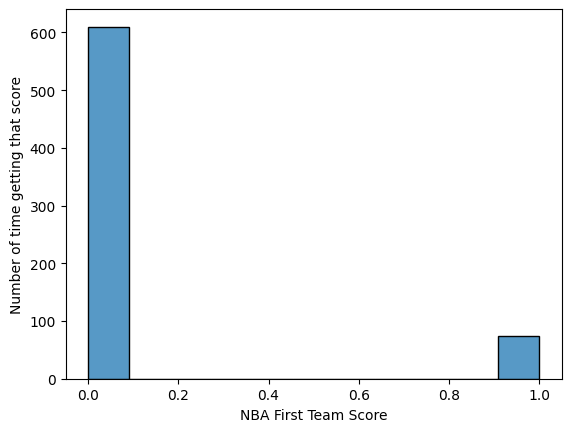

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(awards['All NBA First Team'])
plt.xlabel('NBA First Team Score')
plt.ylabel('Number of time getting that score')
plt.show()

# According to histogram, we can observe for NBA first team, most of the observations are belong to 0.0 to 0.2, there are only few obervation between 0.9 to 1.0. Furthermore, there is an huge gap in the middle

#2.Density plot to check the representation of the distribution

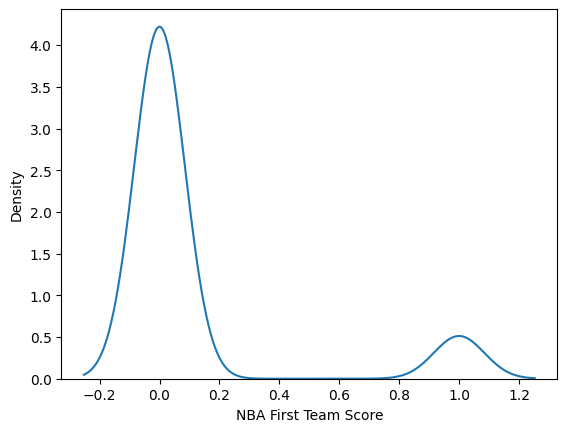

In [ ]:
sns.kdeplot(awards['All NBA First Team'])
plt.xlabel('NBA First Team Score')
plt.show()

# By observing the distribution, we can observe that the First Team score is following an distribution of bimodel, with the first mode center at 0.0 , with the density of 4.0, the second mode at 1.0, with the density of 0.5

# We are doing the same thing for 2nd Team

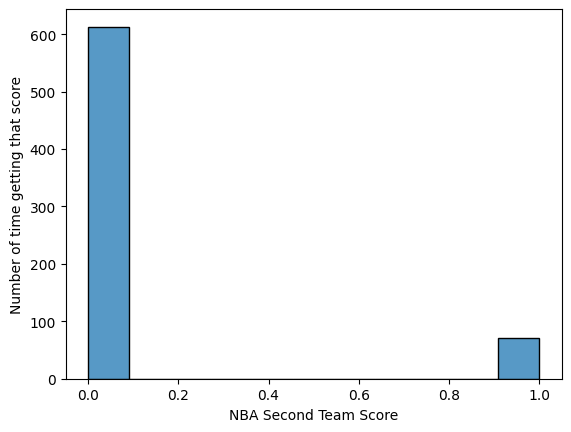

In [ ]:
sns.histplot(awards['All NBA Second Team'])
plt.xlabel('NBA Second Team Score')
plt.ylabel('Number of time getting that score')
plt.show()

# According to histogram, we can observe for NBA second team, most of the observations are belong to 0.0 to 0.2, there are only few obervation between 0.9 to 1.0. Furthermore, there is an huge gap in the middle

#2.Density plot to check the representation of the distribution

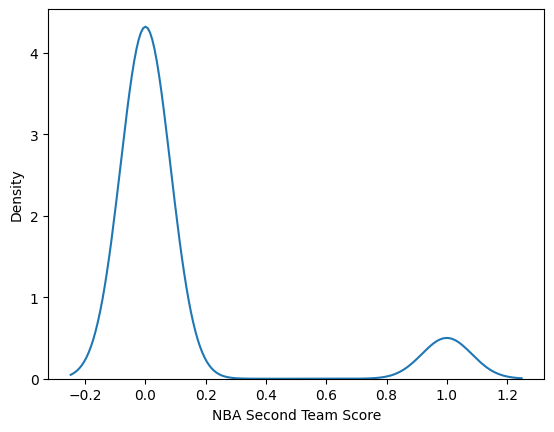

In [ ]:
sns.kdeplot(awards['All NBA Second Team'])
plt.xlabel('NBA Second Team Score')
plt.show()

# By observing the distribution, we can observe that the Second Team score is following an distribution of bimodel, with the first mode center at 0.0 , with the density of 4.0, the second mode at 1.0, with the density of 0.5

# All NBA Third Team

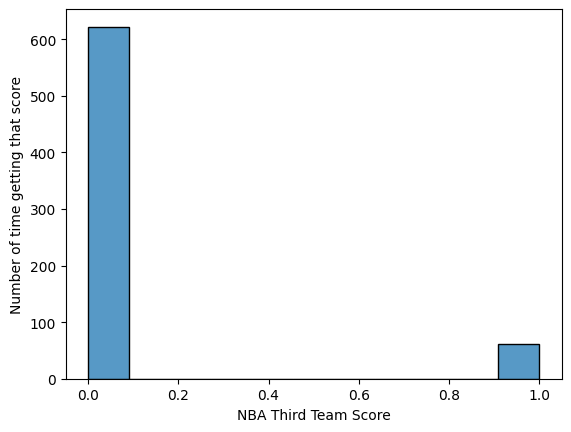

In [ ]:
sns.histplot(awards['All NBA Third Team'])
plt.xlabel('NBA Third Team Score')
plt.ylabel('Number of time getting that score')
plt.show()

# According to histogram, we can observe for NBA second team, most of the observations are belong to 0.0 to 0.2, there are only few obervation between 0.9 to 1.0. Furthermore, there is an huge gap in the middle

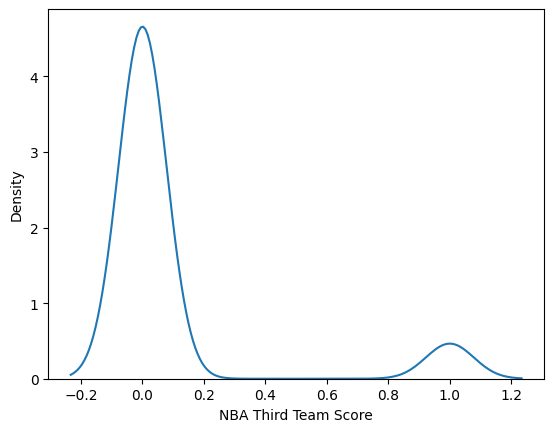

In [ ]:
sns.kdeplot(awards['All NBA Third Team'])
plt.xlabel('NBA Third Team Score')
plt.show()

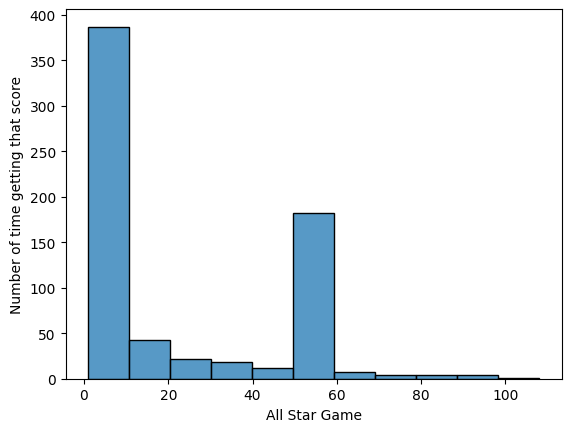

In [ ]:
sns.histplot(awards['allstar_rk'])
plt.xlabel('All Star Game')
plt.ylabel('Number of time getting that score')
plt.show()

# According to the histogram, we can observe the distribution is skewed to the right. we can also oberve most of the score is between 0 to 60. We can also observe is bimodel

# By observing the distribution, we can observe that the Third Team score is following an distribution of bimodel, with the first mode center at 0.0 , with the density of 4.0, the second mode at 1.0, with the density of 0.5

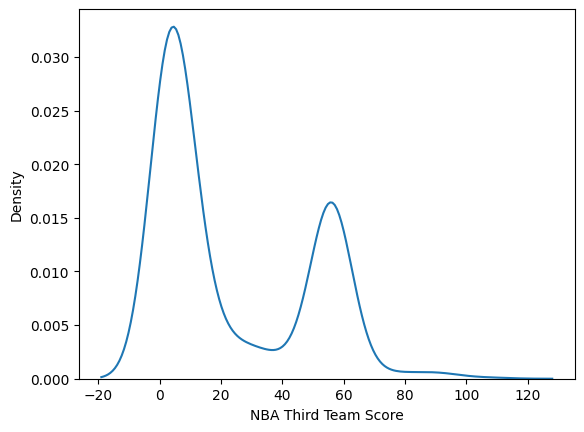

In [ ]:
sns.kdeplot(awards['allstar_rk'])
plt.xlabel('NBA Third Team Score')
plt.show()

# We can observe this variable is bimode, with the first model center around 5, with the density 0f 0.03, with the second model center at 58, with density of 0.017

In [ ]:
from numpy import select
# doing an datamasking
start_year = 2007
end_year = 2021

# Created a mask to filter rows between the specified years
mask = (awards['season']>= start_year) & (awards['season']<=end_year)
# Apply the mask to select the data between 200 7 and 2021
season_data= awards[mask]

In [ ]:
season_data['All NBA First Team'].sum().mean()

74.0

In [ ]:
season_data['All NBA Second Team'].sum().mean()

71.0

In [ ]:
season_data['All NBA Third Team'].sum().mean()

62.0

In [ ]:
# first we select the all_star_game are True
all_star_game = season_data[season_data['all_star_game']==True]
average_allstar_rk = all_star_game['allstar_rk'].sum().mean()

In [ ]:
average_allstar_rk

2709.0

In [ ]:
season_data[season_data['all_star_game']==True]['allstar_rk'].sum().mean()

2709.0

<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 74.0 points per game  
2nd Team: 71.0 points per game  
3rd Team: 62.0 points per game  
All-Star: 2709.X points per game  

# Need to come back later

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [ ]:
awards.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,13.0,3.0,5.0,8.0,8.0,13.0
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,9.0,13.0,9.0,5.0,8.0,8.0,13.0
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,13.0,1.0,5.0,8.0,8.0,13.0
6,2007,1495.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,2.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0


In [ ]:
awards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 949
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   season                           684 non-null    int64  
 1   nbapersonid                      684 non-null    float64
 2   All NBA Defensive First Team     684 non-null    float64
 3   All NBA Defensive Second Team    684 non-null    float64
 4   All NBA First Team               684 non-null    float64
 5   All NBA Second Team              684 non-null    float64
 6   All NBA Third Team               684 non-null    float64
 7   All Rookie First Team            684 non-null    float64
 8   All Rookie Second Team           684 non-null    float64
 9   Bill Russell NBA Finals MVP      684 non-null    float64
 10  Player Of The Month              684 non-null    float64
 11  Player Of The Week               684 non-null    float64
 12  Rookie Of The Month   

In [ ]:
# We need to first do an merging
merged_data = pd.merge(player_data, awards,on=['nbapersonid', 'season'], how='inner')

In [ ]:
# have a look of the newly join dataset
merged_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,True,False,9.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
1,201143,Al Horford,2007,3.0,2007,1610612737,ATL,81,77,2540,...,False,True,56.0,9.0,13.0,7.0,2.0,8.0,8.0,13.0
2,201157,Sean Williams,2007,17.0,2007,1610612751,BKN,73,29,1278,...,False,True,56.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
3,467,Jason Kidd,1994,2.0,2007,1610612751,BKN,51,51,1895,...,True,False,2.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
4,467,Jason Kidd,1994,2.0,2007,1610612742,DAL,29,29,1011,...,True,False,2.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1627749,Dejounte Murray,2016,29.0,2021,1610612759,SAS,68,68,2366,...,True,False,6.0,9.0,2.0,7.0,5.0,8.0,21.0,13.0
692,1630567,Scottie Barnes,2021,4.0,2021,1610612761,TOR,74,74,2617,...,False,True,19.0,9.0,13.0,7.0,1.0,8.0,8.0,1.0
693,1627832,Fred VanVleet,2016,NaN,2021,1610612761,TOR,65,65,2462,...,True,False,6.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
694,1628378,Donovan Mitchell,2017,13.0,2021,1610612762,UTA,67,67,2266,...,True,False,5.0,9.0,13.0,7.0,5.0,8.0,19.0,13.0


In [ ]:
from numpy import select
# doing an datamasking
start_year = 2007

# Created a mask to filter rows between the specified years
mask_first_NBA_Selection = (merged_data['season']>= start_year) & ((merged_data['All NBA First Team'].notna())|(merged_data['All NBA Second Team'].notna())|(merged_data['All NBA Third Team'].notna()))
# Apply the mask to select the data between 200 7 and 2021
first_NBA_Selection_data= merged_data[mask_first_NBA_Selection]

In [ ]:
first_NBA_Selection_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,True,False,9.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
1,201143,Al Horford,2007,3.0,2007,1610612737,ATL,81,77,2540,...,False,True,56.0,9.0,13.0,7.0,2.0,8.0,8.0,13.0
2,201157,Sean Williams,2007,17.0,2007,1610612751,BKN,73,29,1278,...,False,True,56.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
3,467,Jason Kidd,1994,2.0,2007,1610612751,BKN,51,51,1895,...,True,False,2.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
4,467,Jason Kidd,1994,2.0,2007,1610612742,DAL,29,29,1011,...,True,False,2.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1627749,Dejounte Murray,2016,29.0,2021,1610612759,SAS,68,68,2366,...,True,False,6.0,9.0,2.0,7.0,5.0,8.0,21.0,13.0
692,1630567,Scottie Barnes,2021,4.0,2021,1610612761,TOR,74,74,2617,...,False,True,19.0,9.0,13.0,7.0,1.0,8.0,8.0,1.0
693,1627832,Fred VanVleet,2016,NaN,2021,1610612761,TOR,65,65,2462,...,True,False,6.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
694,1628378,Donovan Mitchell,2017,13.0,2021,1610612762,UTA,67,67,2266,...,True,False,5.0,9.0,13.0,7.0,5.0,8.0,19.0,13.0


In [ ]:
# We need to Calculated the number of years it took for each player to win thier first All NBA award
first_NBA_Selection_data['Years to First All NBA'] = first_NBA_Selection_data['season']-first_NBA_Selection_data['draftyear']

In [ ]:
average_years = first_NBA_Selection_data['Years to First All NBA'].mean()

In [ ]:
average_years

4.656609195402299

<strong><span style="color:red">ANSWER 2:</span></strong>   

4.7 Years

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production.


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [ ]:
player_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,Jordan Schakel,2021,NaN,2021,1610612764,WAS,4,0,30,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,Corey Kispert,2021,15.0,2021,1610612764,WAS,77,36,1801,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,Kyle Kuzma,2017,27.0,2021,1610612764,WAS,66,66,2204,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,Raul Neto,2013,47.0,2021,1610612764,WAS,70,19,1372,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4



All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.
Starter: A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.
Rotation: A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.
Roster: A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.
Out of the League: A player is "Out of the League" if he is not in the NBA in that season.

In [ ]:
from numpy import select
import numpy as np
# doing an datamasking
start_year = 2007

# Created a mask to filter rows between the specified years
mask_buckets = (merged_data['season']== start_year) & ((merged_data['All NBA First Team'].notna())|(merged_data['All NBA Second Team'].notna())|(merged_data['All NBA Third Team'].notna()))
# Apply the mask to select the data between 200 7 and 2021
bucket_data= merged_data[mask_buckets]

In [ ]:
bucket_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nbapersonid                      44 non-null     int64  
 1   player                           44 non-null     object 
 2   draftyear                        44 non-null     int64  
 3   draftpick                        43 non-null     float64
 4   season                           44 non-null     int64  
 5   nbateamid                        44 non-null     int64  
 6   team                             44 non-null     object 
 7   games                            44 non-null     int64  
 8   games_start                      44 non-null     int64  
 9   mins                             44 non-null     int64  
 10  fgm                              44 non-null     int64  
 11  fga                              44 non-null     int64  
 12  fgp                     

In [ ]:
import pandas as pd
import numpy as np

games_per_season = {
    2011: 66,
    2019: 72,
    2020: 72
    }
# We are Adjust mintues and games played for seasons with fewer games
bucket_data['adjusted_minutes'] = bucket_data['mins']*bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))
bucket_data['adjusted_games_start'] = bucket_data['games_start']* bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))

# Define a function to calculate the outcome for a single season
def calculate_season_outcome(row):
  if(
      row['All NBA First Team'] == 1.0 or
      row['All NBA Second Team'] == 1.0 or
      row['All NBA Third Team'] == 1.0 or
      row['Most Valuable Player_rk']== 1.0 or
      row['Defensive Player Of The Year_rk'] == 1.0
  ):
    return "Elite"
  elif row['all_star_game'] == True:
    return "All-Star"
  elif row['adjusted_games_start'] >= 41 or row['adjusted_minutes'] >= 2000:
    return "Starter"
  elif row['adjusted_minutes']>=1000:
    return "Rotation"
  elif row['adjusted_minutes']>= 1:
    return "Roster"
  else:
    return "Out of the League"

# We are Apply the function to calculate the season outcome
bucket_data['season_outcome'] = bucket_data.apply(calculate_season_outcome, axis=1)
# We are Grouping the data by player and calculate the career outcome
career_outcomes=bucket_data.groupby('nbapersonid').apply(lambda group: group['season_outcome'].iloc[:4].max() if len(group) >= 4 else "Out of the League")
# Reset the index to make it a DataFrame
career_outcomes = career_outcomes.reset_index(name='career_outcome')
# We are Display the career outcomes for each player
print(career_outcomes)

    nbapersonid     career_outcome
0           467  Out of the League
1           708  Out of the League
2           739  Out of the League
3           947  Out of the League
4           951  Out of the League
5           959  Out of the League
6           977  Out of the League
7          1495  Out of the League
8          1497  Out of the League
9          1712  Out of the League
10         1717  Out of the League
11         1718  Out of the League
12         1888  Out of the League
13         2207  Out of the League
14         2397  Out of the League
15         2405  Out of the League
16         2406  Out of the League
17         2430  Out of the League
18         2434  Out of the League
19         2449  Out of the League
20         2544  Out of the League
21         2546  Out of the League
22         2547  Out of the League
23         2548  Out of the League
24         2561  Out of the League
25         2730  Out of the League
26       101108  Out of the League
27       200081  Out

<ipython-input-379-274cb2946cc4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bucket_data['adjusted_minutes'] = bucket_data['mins']*bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))
<ipython-input-379-274cb2946cc4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bucket_data['adjusted_games_start'] = bucket_data['games_start']* bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))
<ipython-input-379-274cb2946cc4>:35: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
bucket_data[bucket_data['season_outcome']=="Elite"].shape[0]

12

In [ ]:
bucket_data[bucket_data['season_outcome']=="All-Star"].shape[0]

15

In [ ]:
bucket_data[bucket_data['season_outcome']=="Starter"].shape[0]

13

In [ ]:
bucket_data[bucket_data['season_outcome']=="Rotation"].shape[0]

4

In [ ]:
bucket_data[bucket_data['season_outcome']=="Roster"].shape[0]

0

In [ ]:
bucket_data[bucket_data['season_outcome']=="Out of League"].shape[0]

0

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 12 players.  
All-Star: 15 players.  
Starter: 13 players.  
Rotation: 4 players.  
Roster: 0 players.  
Out of League: 0 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career.

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach.

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background.
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



In [ ]:
from numpy import select
import numpy as np
# doing an datamasking
start_year = 2015

# Created a mask to filter rows between the specified years
mask_buckets_model = (merged_data['season']>= start_year) & ((merged_data['All NBA First Team'].notna())|(merged_data['All NBA Second Team'].notna())|(merged_data['All NBA Third Team'].notna()))
# Apply the mask to select the data between 200 7 and 2021
bucket_model_data= merged_data[mask_buckets]

In [ ]:
import pandas as pd
import numpy as np

games_per_season = {
    2011: 66,
    2019: 72,
    2020: 72
    }
# We are Adjust mintues and games played for seasons with fewer games
bucket_model_data['adjusted_minutes'] = bucket_data['mins']*bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))
bucket_model_data['adjusted_games_start'] = bucket_data['games_start']* bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))

# Define a function to calculate the outcome for a single season
def calculate_season_outcome(row):
  if(
      row['All NBA First Team'] == 1.0 or
      row['All NBA Second Team'] == 1.0 or
      row['All NBA Third Team'] == 1.0 or
      row['Most Valuable Player_rk']== 1.0 or
      row['Defensive Player Of The Year_rk'] == 1.0
  ):
    return "Elite"
  elif row['all_star_game'] == True:
    return "All-Star"
  elif row['adjusted_games_start'] >= 41 or row['adjusted_minutes'] >= 2000:
    return "Starter"
  elif row['adjusted_minutes']>=1000:
    return "Rotation"
  elif row['adjusted_minutes']>= 1:
    return "Roster"
  else:
    return "Out of the League"

# We are Apply the function to calculate the season outcome
bucket_model_data['season_outcome'] = bucket_model_data.apply(calculate_season_outcome, axis=1)
# We are Grouping the data by player and calculate the career outcome
bucket_outcomes=bucket_model_data.groupby('nbapersonid').apply(lambda group: group['season_outcome'].iloc[:4].max() if len(group) >= 4 else "Out of the League")
# Reset the index to make it a DataFrame
bucket_outcomes = bucket_outcomes.reset_index(name='career_outcome')
# We are Display the career outcomes for each player
print(bucket_outcomes)

    nbapersonid     career_outcome
0           467  Out of the League
1           708  Out of the League
2           739  Out of the League
3           947  Out of the League
4           951  Out of the League
5           959  Out of the League
6           977  Out of the League
7          1495  Out of the League
8          1497  Out of the League
9          1712  Out of the League
10         1717  Out of the League
11         1718  Out of the League
12         1888  Out of the League
13         2207  Out of the League
14         2397  Out of the League
15         2405  Out of the League
16         2406  Out of the League
17         2430  Out of the League
18         2434  Out of the League
19         2449  Out of the League
20         2544  Out of the League
21         2546  Out of the League
22         2547  Out of the League
23         2548  Out of the League
24         2561  Out of the League
25         2730  Out of the League
26       101108  Out of the League
27       200081  Out

<ipython-input-387-20c74243b250>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bucket_model_data['adjusted_minutes'] = bucket_data['mins']*bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))
<ipython-input-387-20c74243b250>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bucket_model_data['adjusted_games_start'] = bucket_data['games_start']* bucket_data['season'].map(lambda x: 82/ games_per_season.get(x, 82))
<ipython-input-387-20c74243b250>:35: SettingWithCopyWarning: 
A value is try

In [ ]:
bucket_model_data.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk,adjusted_minutes,adjusted_games_start,season_outcome
0,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,9.0,13.0,7.0,5.0,8.0,8.0,13.0,3343.0,82.0,All-Star
1,201143,Al Horford,2007,3.0,2007,1610612737,ATL,81,77,2540,...,9.0,13.0,7.0,2.0,8.0,8.0,13.0,2540.0,77.0,Starter
2,201157,Sean Williams,2007,17.0,2007,1610612751,BKN,73,29,1278,...,9.0,13.0,7.0,5.0,8.0,8.0,13.0,1278.0,29.0,Rotation
3,467,Jason Kidd,1994,2.0,2007,1610612751,BKN,51,51,1895,...,9.0,13.0,7.0,5.0,8.0,8.0,13.0,1895.0,51.0,All-Star
4,467,Jason Kidd,1994,2.0,2007,1610612742,DAL,29,29,1011,...,9.0,13.0,7.0,5.0,8.0,8.0,13.0,1011.0,29.0,All-Star


In [ ]:
bucket_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 73 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nbapersonid                      44 non-null     int64  
 1   player                           44 non-null     object 
 2   draftyear                        44 non-null     int64  
 3   draftpick                        43 non-null     float64
 4   season                           44 non-null     int64  
 5   nbateamid                        44 non-null     int64  
 6   team                             44 non-null     object 
 7   games                            44 non-null     int64  
 8   games_start                      44 non-null     int64  
 9   mins                             44 non-null     int64  
 10  fgm                              44 non-null     int64  
 11  fga                              44 non-null     int64  
 12  fgp                     

In [ ]:
# We are making an classification regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
# before defining the X anf y variable, we need to frist take care of the boolean variable
encoded_all_star_game = pd.get_dummies(bucket_model_data['all_star_game'], prefix='all_star_game')
# We need to append back the encoded columns to the original DataFrame
bucket_model_data = pd.concat([bucket_model_data,encoded_all_star_game],axis=1)
# defining the X and y variables
X= bucket_model_data[['All NBA First Team','All NBA Second Team','All NBA Third Team','Most Valuable Player_rk','Defensive Player Of The Year_rk','all_star_game','games_start','mins']]
y =bucket_model_data['season_outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
Logistic_Regression_model = LogisticRegression()
# We are fitting the logistic model
Logistic_Regression_model.fit(X_train, y_train)
# we are doing an prediction using the testing dataset
predicted_result = Logistic_Regression_model.predict(X_test)

# We need to Evaluate the model's performance
# can calculate accuracy, precision, recall, F1-score, and confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predicted_result)
precision = precision_score(y_test, predicted_result,average='weighted')
recall = recall_score(y_test, predicted_result,average='weighted')
f1 = f1_score(y_test, predicted_result, average='weighted')
confusion_matrix = confusion_matrix(y_test, predicted_result)

# we are printing the result
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score", f1)
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.4444444444444444
Precision: 0.5277777777777778
Recall: 0.4444444444444444
F1-Score 0.43703703703703706
Classification Report:
 <function classification_report at 0x7c02698db1c0>
Confusion Matrix:
 [[1 2 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [1 1 0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# According to the classification report, we can observe the overall accuracy is 0.444 or 44.4%, not so bad, but also not so good.  The Precision is 0.5278 is 52.78%, the recall is 0.4444, 44.44%, The F1-Score is 0.4370. In the end, we conclude the models' performance appears to be reasonable, however, it might not be very accurate, since the precision, recall, F1-score suggest there might be an room for improvement.

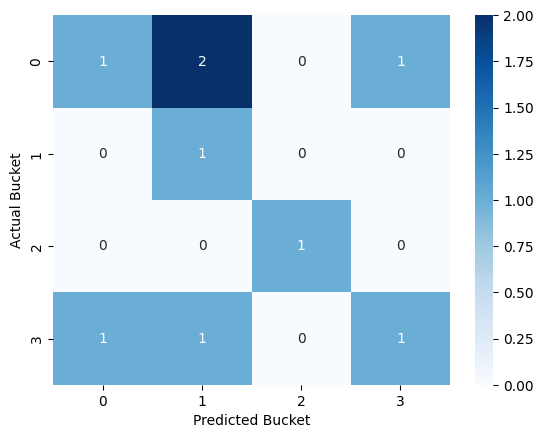

In [ ]:
# First we are doing the Confusion Matrix Heatmap
# We are Creating a heatmap of the confusion matrix to visualize true positives, true negatives, false positives, false negatives
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Intialized the confusion matrix
cm = confusion_matrix(y_test,predicted_result)
# We are doing the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Bucket')
plt.ylabel('Actual Bucket')
plt.show()

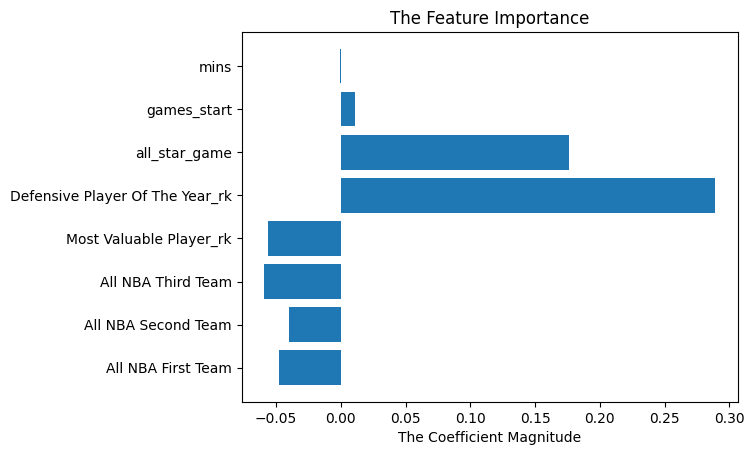

In [ ]:
# We wish to do an feature importance plot
feature_importance = Logistic_Regression_model.coef_[0]
plt.barh(X.columns, feature_importance)
plt.xlabel('The Coefficient Magnitude')
plt.title('The Feature Importance')
plt.show()

#A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background.

# Answer: The model work like this, first we have those season outcome also know as buckets, out models learn from the labeled data to make predictions about the class and category for the new data points, is will use patterns and relationship to make decisions to decided which of those buckets our new data points belongs to

#What you view as the strengths and weaknesses of your model.

# Answer: Strengths: Interpretability: it is very easier to understand how prediction are made, Efficiency: because it can handle large datasets and high-dimensonal feature spaces, Feature Importance: this model can help identify important features that contribute to predictions, Imbalanced Data Handling: by using the technique of oversamplining undersampling can help address imbalanced data.

# Weakness: Overfitting, because when we have complex data we tend to overfit and getting the trend that are noise or not useful. Class Separability, in the case the classes are highly overlapping or inseparable, this odel may struggle to achieve high accuracy. Handling Missing Data, since this model require complete data, handling missing data can ba a challenge.


# How you'd address the weaknesses if you had more time and or more data.

# Answer: If I have more time, I will address the overfitting using Regularization: By using L1,L2 norm, it can help add penalty terms to the loss function, adn discouraging model to fit noise in the data, cross-validation: when we implement k-fold corss-validation to assess how well model generalised to the new data, we can identify the overfitting.simpler Models:using simpler model like decision tree with limit depth will avoid complex, overfit model. I will address the class separability by doing resampling: when we oversampling the minority class or undersmapling the majority class it can help balance the dataset, Feature enginnering: using PCA can be used to do the dimensionality reduction, also by collecting more data: when we have more data, the class will be more easier to separate. For Handling missing data, I will use data imputation: using the technique of mran,median, and mode.

# Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.

In [ ]:
from numpy import select
import numpy as np
# doing an datamasking

# Created a mask to filter rows between the specified years
mask_player_model = ((merged_data['All NBA First Team'].notna())|(merged_data['All NBA Second Team'].notna())|(merged_data['All NBA Third Team'].notna()))
# Apply the mask to select the data between 200 7 and 2021
player_model_data= merged_data[mask_player_model]

In [ ]:
player_to_select=["Shai Gilgeous-Alexander", "Zion Williamson", "James Wiseman", "Josh Giddey"]
# we are selecting the require player
selected_players = player_model_data[player_model_data['player'].isin(player_to_select)]

In [ ]:
selected_players

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
533,1628983,Shai Gilgeous-Alexander,2018,11.0,2018,1610612746,LAC,82,73,2174,...,False,True,43.0,9.0,13.0,7.0,6.0,8.0,8.0,6.0
592,1629627,Zion Williamson,2019,1.0,2019,1610612740,NOP,24,24,668,...,False,True,32.0,9.0,13.0,7.0,3.0,8.0,8.0,4.0
595,1628983,Shai Gilgeous-Alexander,2018,11.0,2019,1610612760,OKC,70,70,2428,...,False,True,11.0,9.0,6.0,7.0,5.0,8.0,8.0,13.0
624,1630164,James Wiseman,2020,2.0,2020,1610612744,GSW,39,27,836,...,False,True,84.0,9.0,13.0,7.0,5.0,8.0,8.0,13.0
637,1629627,Zion Williamson,2019,1.0,2020,1610612740,NOP,61,61,2026,...,True,True,8.0,9.0,9.0,7.0,5.0,8.0,19.0,13.0


In [ ]:
import pandas as pd
import numpy as np

games_per_season = {
    2011: 66,
    2019: 72,
    2020: 72
    }
# We are Adjust mintues and games played for seasons with fewer games
selected_players['adjusted_minutes'] = selected_players['mins']*selected_players['season'].map(lambda x: 82/ games_per_season.get(x, 82))
selected_players['adjusted_games_start'] = selected_players['games_start']* selected_players['season'].map(lambda x: 82/ games_per_season.get(x, 82))

# Define a function to calculate the outcome for a single season
def calculate_season_outcome(row):
  if(
      row['All NBA First Team'] == 1.0 or
      row['All NBA Second Team'] == 1.0 or
      row['All NBA Third Team'] == 1.0 or
      row['Most Valuable Player_rk']== 1.0 or
      row['Defensive Player Of The Year_rk'] == 1.0
  ):
    return "Elite"
  elif row['all_star_game'] == True:
    return "All-Star"
  elif row['adjusted_games_start'] >= 41 or row['adjusted_minutes'] >= 2000:
    return "Starter"
  elif row['adjusted_minutes']>=1000:
    return "Rotation"
  elif row['adjusted_minutes']>= 1:
    return "Roster"
  else:
    return "Out of the League"

# We are Apply the function to calculate the season outcome
selected_players['season_outcome'] = selected_players.apply(calculate_season_outcome, axis=1)
# We are Grouping the data by player and calculate the career outcome
player_outcomes=selected_players.groupby('nbapersonid').apply(lambda group: group['season_outcome'].iloc[:4].max() if len(group) >= 4 else "Out of the League")
# Reset the index to make it a DataFrame
player_outcomes = player_outcomes.reset_index(name='career_outcome')
# We are Display the career outcomes for each player
print(player_outcomes)

   nbapersonid     career_outcome
0      1628983  Out of the League
1      1629627  Out of the League
2      1630164  Out of the League


<ipython-input-396-32ec9d7a84a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_players['adjusted_minutes'] = selected_players['mins']*selected_players['season'].map(lambda x: 82/ games_per_season.get(x, 82))
<ipython-input-396-32ec9d7a84a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_players['adjusted_games_start'] = selected_players['games_start']* selected_players['season'].map(lambda x: 82/ games_per_season.get(x, 82))
<ipython-input-396-32ec9d7a84a7>:35: SettingWithCopyWarnin

# We can also observe the important feature is the all_star_game, Defensive Player of The Year_rk, and the Most valuable Player_rk

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  

### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [ ]:
rebounding_data.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
0,BOS,PHI,2022-10-18,1,10,39,0.256410
1,PHI,BOS,2022-10-18,1,8,42,0.190476
2,GSW,LAL,2022-10-18,1,16,57,0.280702
3,LAL,GSW,2022-10-18,1,14,57,0.245614
4,ORL,DET,2022-10-19,1,13,47,0.276596


In [ ]:
rebounding_data.tail()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
2455,LAC,PHX,2023-04-09,82,18,56,0.321429
2456,MEM,OKC,2023-04-09,82,12,55,0.218182
2457,POR,GSW,2023-04-09,82,11,61,0.180328
2458,SAC,DEN,2023-04-09,82,12,50,0.240000
2459,MIN,NOP,2023-04-09,82,11,49,0.224490


In [ ]:
# starting to implement a simpe linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# First we are Selecting the first 80 rows of the data
selected_data = rebounding_data.iloc[:80]
# define the X and y variable for modeling
X= rebounding_data[['game_number','offensive_rebounds','off_rebound_chances']]
y= rebounding_data['oreb_pct']
# defining the trianing set and testing set
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=123)
# define an new instance for linear regression
simple_linear_regression_model = LinearRegression()
simple_linear_regression_model_fit=simple_linear_regression_model.fit(X_train, y_train)
simple_linear_regression_model_predict=simple_linear_regression_model.predict(X_test)


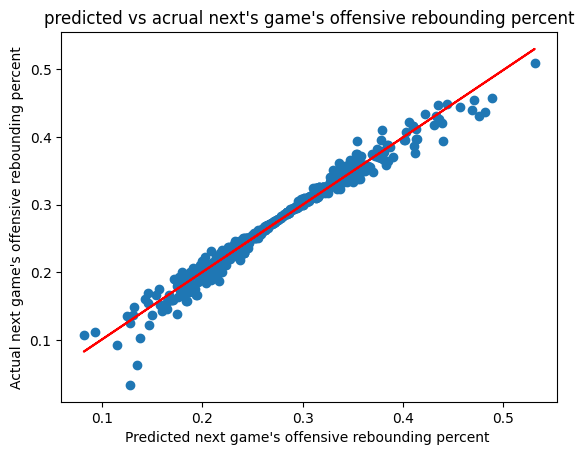

In [ ]:
# next we wish to do an visualization with trend lines to check how well the model fit
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(simple_linear_regression_model_predict, y_test)
# We are Calculate the trendline (best-fit line)
m, b = np.polyfit(simple_linear_regression_model_predict, y_test,1)
# then we are adding the trendline to the plot
plt.plot(simple_linear_regression_model_predict, m*simple_linear_regression_model_predict+b, color='red')
# We are setting the label and show the plot
plt.xlabel("Predicted next game's offensive rebounding percent ")
plt.ylabel("Actual next game's offensive rebounding percent")
plt.title("predicted vs acrual next's game's offensive rebounding percent")
plt.show()


# Next, we come to the step of the prediction

In [ ]:
# We need to Extract features for the single row we wish  to predict
single_row_features = rebounding_data.iloc[80][['game_number', 'offensive_rebounds', 'off_rebound_chances']].values.reshape(1, -1)
# Next, we are Using the trained model to make prediction
predicted_oreb_pct = simple_linear_regression_model.predict(single_row_features)
# Then, we are Printing the redicted oreb_pct for row 81
print("The Predicted oreb_pct for row 81:", predicted_oreb_pct)

The Predicted oreb_pct for row 81: [0.31320159]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<strong><span style="color:red">ANSWER 1:</span></strong>  

31.3%

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2: We can implement using the different condition when predicting the percentage, we will take into account of whether that player is an great offensive rebounder, if it is, we will need to adjust the model  by adding the boolean variable whether the plater is an great offensive rebounder. As for other player who is not missing, we will predict their percentage using the original model. Based on conditions, we can provided different model for both two condtions.</span></strong>  

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3: The First weakeness is since it is numerical data, is will be extremely impace by the outliers, what if we have one player have extremely low percentage like 0% or an player have extremely high percentage like 100%, it will either lead the data have the distribution of right skewed or left skewed, highly impact the accuracy of our predictions. The best idea is to use median to predict for future percentage. The second weakness is the simple linear model might not be so well model the data, since there might be other kind of relationship such as qudratic, or power, expoential, the solution is to make the model to be more flexible for differnet kind of relationship. The third weakness is the predicting variable might not be enough, there might need to have other variable need to taken into account such as social or economical event that may impact the chance of winning and losing. Sometime during an hard enconomical periods, the player's mood might not be as good, their emoation can also impact the final outcome of the game.</span></strong>  

In [ ]:
html_link = f'<a href="https://colab.research.google.com/drive/1hSiG1ds5abVbqMSFLczKk_K6VFeQ45ea#scrollTo=oYTi8lGicRw1" target="_blank">Open in Colab</a>'
print(html_link)

<a href="https://colab.research.google.com/drive/1hSiG1ds5abVbqMSFLczKk_K6VFeQ45ea#scrollTo=oYTi8lGicRw1" target="_blank">Open in Colab</a>
